In [16]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt


In [17]:
data = pd.read_csv('malicious_phish.csv')

#data.shape
cols = ['phishing','benign','defacement','malware']
data.columns = ['text','label']
data.head()

,text,label
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


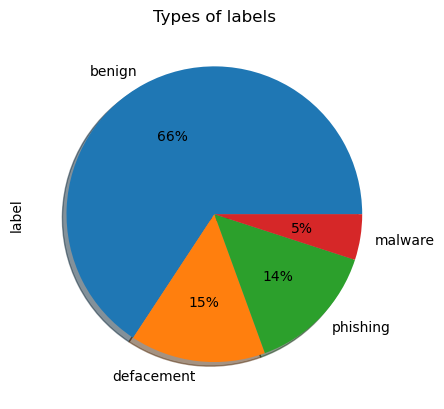

In [18]:
from matplotlib import pyplot as plt
plt.figure()

data['label'].value_counts().plot(kind='pie', autopct= '%1.0f%%', shadow=True)
plt.title('Types of labels')
plt.show()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
X.shape

(651191, 590757)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, data['label'], train_size=0.1, test_size=0.03, random_state=1337) #Default is test_size = 0.25
y_train

454816        benign
249609    defacement
18649         benign
370913      phishing
623577      phishing
             ...    
473498        benign
289207    defacement
487660        benign
94317         benign
329757        benign
Name: label, Length: 65119, dtype: object

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

classifier = model.fit(X_train, y_train)
cols = list(classifier.classes_)
cols

In [ ]:
y_pred = model.predict(X_test)
y_pred


In [ ]:
print("Accuracy: ", model.score(X_test, y_test))

In [ ]:
import pickle
filename = 'url.pickle'
pickle.dump(model, open(filename, 'wb'))
